1\. Helyszín eloszlása

# 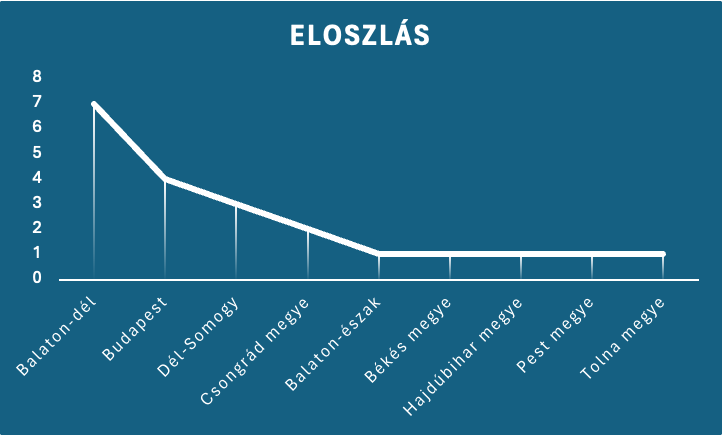

In [12]:
SELECT hely, COUNT(*) as Darab,
(COUNT(*) * 100 / (SELECT COUNT(*) FROM szallashely)) AS százalék 
FROM szallashely
GROUP BY hely
ORDER BY százalék DESC;

(9 rows affected)

Total execution time: 00:00:00.029

hely,Darab,százalék
Balaton-dél,7,33
Budapest,4,19
Dél-Somogy,3,14
Csongrád megye,2,9
Balaton-észak,1,4
Békés megye,1,4
Hajdúbihar megye,1,4
Pest megye,1,4
Tolna megye,1,4


2\. Szállásonként legtöbb, legkevesebb illetve átlagosan foglalt napok száma.

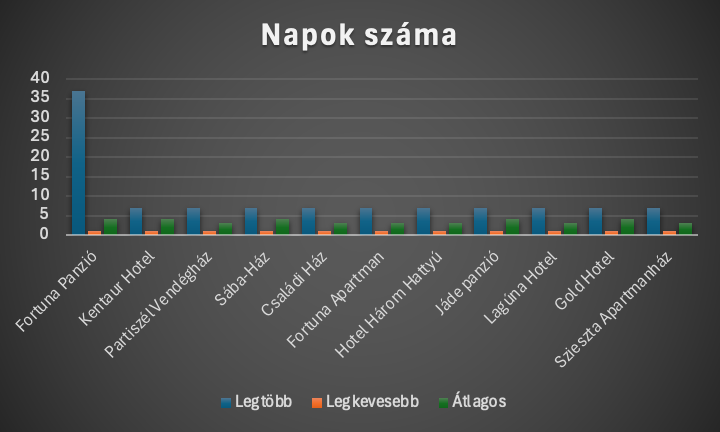

In [3]:
SELECT szallas_nev, MAX(DATEDIFF(DAY,METTOL,MEDDIG)) as Legtöbb_nap, 
MIN(DATEDIFF(DAY,METTOL,MEDDIG)) as Legkevesebb_nap,
AVG(DATEDIFF(DAY,METTOL,MEDDIG)) as Átlagos_nap
FROM Foglalas f JOIN Szoba sz on f.SZOBA_FK=sz.SZOBA_ID JOIN Szallashely sza on sz.SZALLAS_FK=sza.SZALLAS_ID
GROUP BY SZALLAS_NEV
ORDER BY Legtöbb_nap DESC;


(11 rows affected)

Total execution time: 00:00:00.040

szallas_nev,Legtöbb_nap,Legkevesebb_nap,Átlagos_nap
Fortuna Panzió,37,1,4
Kentaur Hotel,7,1,4
Partiszél Vendégház,7,1,3
Sába-Ház,7,1,4
Családi Ház,7,1,3
Fortuna Apartman,7,1,3
Hotel Három Hattyú,7,1,3
Jáde panzió,7,1,4
Lagúna Hotel,7,1,3
Gold Hotel,7,1,4


3\. Az egyes szállások foglalásához hányszor nem tartozik dátum.
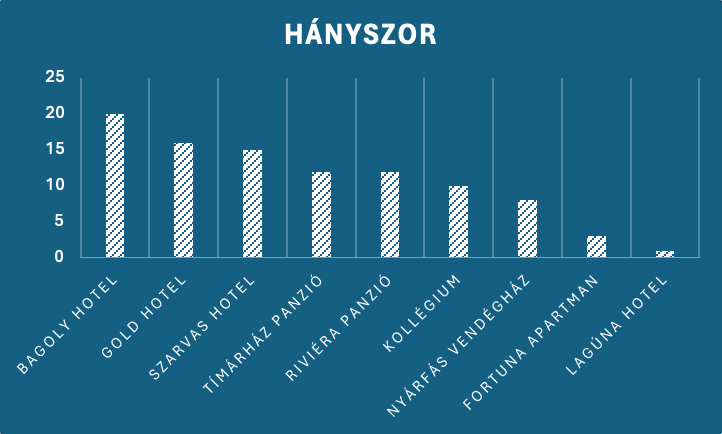

In [32]:
SELECT sza.SZALLAS_NEV, COUNT(*)-COUNT(f.METTOL) as Hányszor
FROM foglalas f RIGHT JOIN szoba sz on f.SZOBA_FK=sz.SZOBA_ID JOIN szallashely sza on sz.SZALLAS_FK=sza.SZALLAS_ID
WHERE METTOL is NUll
GROUP BY sza.SZALLAS_NEV
ORDER BY Hányszor DESC;

Warning: Null value is eliminated by an aggregate or other SET operation.

(17 rows affected)

Total execution time: 00:00:00.032

SZALLAS_NEV,Hányszor
Bagoly Hotel,20
Gold Hotel,16
Szarvas Hotel,15
Tímárház Panzió,12
Riviéra Panzió,12
Kollégium,10
Nyárfás Vendégház,8
Fortuna Apartman,3
Lagúna Hotel,1
Hotel Három Hattyú,0
